In [36]:
# Variáveis Iniciais do Sistema
plot_min_max_horizontal_lines = True

In [4]:
# Importações de Bibliotecas Necessárias
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
print("Reading CSV...")
df = pd.read_csv('generated_dataset.csv')
df = df.drop('timeTo',axis=1)

print("Setting the Pattern in DateTime Columns...")
df['timeFrom'] = pd.to_datetime(df['timeFrom'], errors='ignore')
df['timeFrom'] = pd.to_datetime(df["timeFrom"].dt.strftime('%d-%m-%Y %H:%M'))

print("Done!")

df

Reading CSV...
Setting the Pattern in DateTime Columns...
Done!


,timeFrom
0,2020-01-01 08:00:00
1,2020-01-01 08:00:00
2,2020-01-01 08:00:00
3,2020-01-01 08:00:00
4,2020-01-01 08:09:00
...,...
120937,2020-12-30 22:16:00
120938,2020-12-30 22:30:00
120939,2020-12-30 22:30:00
120940,2020-12-30 22:43:00


In [8]:
df1 = df.copy()

print("Setting the Pattern in DateTime Columns...")
df1['timeFrom'] = pd.to_datetime(df1['timeFrom'], errors='ignore')

print("Grouping by Day...")
df1 = df1.groupby(df1['timeFrom'].dt.date).size().reset_index(name='TotalParkings')

print("Done!")
df1

Setting the Pattern in DateTime Columns...
Grouping by Day...
Done!


,timeFrom,TotalParkings
0,2020-01-01,334
1,2020-01-02,310
2,2020-01-03,343
3,2020-01-04,380
4,2020-01-05,288
...,...,...
360,2020-12-26,328
361,2020-12-27,304
362,2020-12-28,384
363,2020-12-29,337


Setting the Pattern in DateTime Columns...


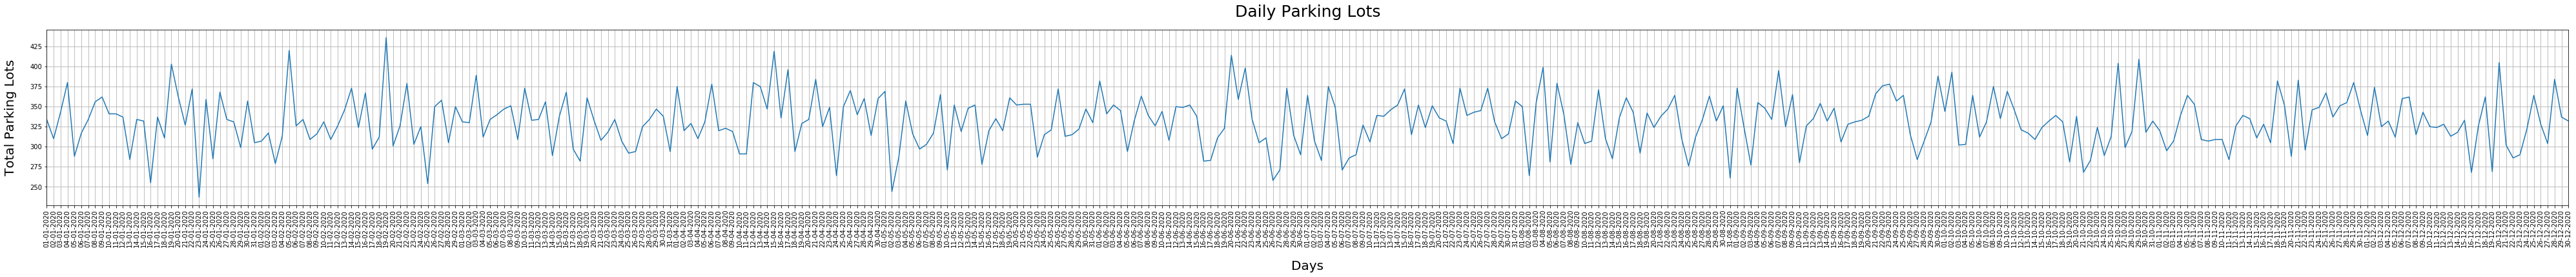

In [34]:
# Plot Graph with Y starting from the Lower Value (not zero)

df2 = df1.copy()

print("Setting the Pattern in DateTime Columns...")
df2['timeFrom'] = pd.to_datetime(df2['timeFrom'], errors='ignore')

df2['timeFrom'] = df2['timeFrom'].dt.strftime('%d-%m-%Y')
df2 = df2.set_index('timeFrom')

plt.subplots(figsize=(70,5))
plt.title("Daily Parking Lots", fontsize=25, pad=20)
plt.xlabel("Days", fontsize=20, labelpad=20)
plt.ylabel("Total Parking Lots", fontsize=20, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)
plt.grid()
plt.plot(df2)

Setting the Pattern in DateTime Columns...


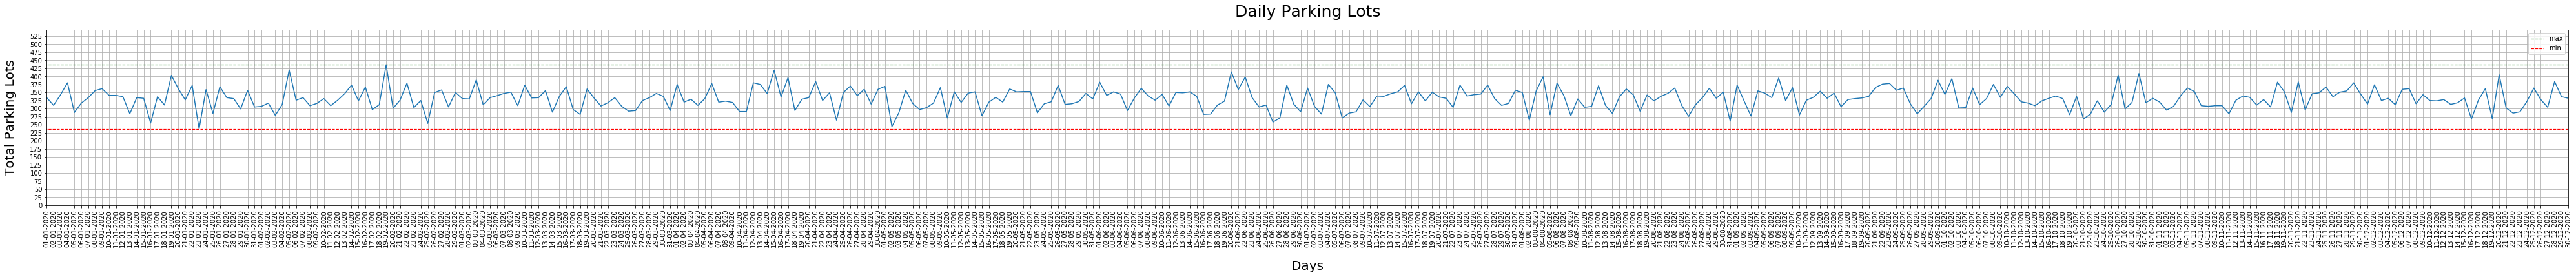

In [42]:
# Plot Graph with Y starting from Zero

df2 = df1.copy()

print("Setting the Pattern in DateTime Columns...")
df2['timeFrom'] = pd.to_datetime(df2['timeFrom'], errors='ignore')

df2['timeFrom'] = df2['timeFrom'].dt.strftime('%d-%m-%Y')
df2 = df2.set_index('timeFrom')


plt.subplots(figsize=(70,5))
plt.ylim(0,df2['TotalParkings'].max()*1.25)
plt.locator_params(axis='y', nbins=25)

plt.title("Daily Parking Lots", fontsize=25, pad=20)
plt.xlabel("Days", fontsize=20, labelpad=20)
plt.ylabel("Total Parking Lots", fontsize=20, labelpad=20)

if (plot_min_max_horizontal_lines):
    plt.hlines(df2['TotalParkings'].max(), colors='#0b7a0b', linestyles='dashed', label='max', xmin=-1, xmax=len(df2), lw=1.2)
    plt.hlines(df2['TotalParkings'].min(), colors='r', linestyles='dashed', label='min', xmin=-1, xmax=len(df2), lw=1.2)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.plot(df2)